In [1]:
import sklearn
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Perform PCA on the data with different numbers of components
for k in [1, 2, 3, 4]:
  pca = PCA(n_components=k)
  pca.fit(X)
  
  print(f"Explained Variance Ratio for k={k}:", pca.explained_variance_ratio_)
  print(f"Explained Variance for k={k}:", pca.explained_variance_)

Explained Variance Ratio for k=1: [0.92461872]
Explained Variance for k=1: [4.22824171]
Explained Variance Ratio for k=2: [0.92461872 0.05306648]
Explained Variance for k=2: [4.22824171 0.24267075]
Explained Variance Ratio for k=3: [0.92461872 0.05306648 0.01710261]
Explained Variance for k=3: [4.22824171 0.24267075 0.0782095 ]
Explained Variance Ratio for k=4: [0.92461872 0.05306648 0.01710261 0.00521218]
Explained Variance for k=4: [4.22824171 0.24267075 0.0782095  0.02383509]


In [4]:
# Standardize the data and perform PCA again
scaler = StandardScaler()
std_X = scaler.fit_transform(X)

for k in [1, 2, 3, 4]:
  pca = PCA(n_components=k)
  pca.fit(std_X)
  
  print(f"Explained Variance Ratio for k={k}:", pca.explained_variance_ratio_)
  print(f"Explained Variance for k={k}:", pca.explained_variance_)

Explained Variance Ratio for k=1: [0.72962445]
Explained Variance for k=1: [2.93808505]
Explained Variance Ratio for k=2: [0.72962445 0.22850762]
Explained Variance for k=2: [2.93808505 0.9201649 ]
Explained Variance Ratio for k=3: [0.72962445 0.22850762 0.03668922]
Explained Variance for k=3: [2.93808505 0.9201649  0.14774182]
Explained Variance Ratio for k=4: [0.72962445 0.22850762 0.03668922 0.00517871]
Explained Variance for k=4: [2.93808505 0.9201649  0.14774182 0.02085386]


We can see the three clusters corresponding to the three Iris flowers.


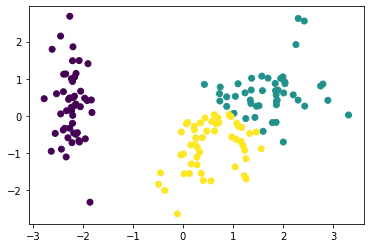

In [5]:
# Standardize the data and project it onto the first two principal components
scaler = StandardScaler()
std_X = scaler.fit_transform(X)

pca = PCA(n_components=2)
proj_X = pca.fit_transform(std_X)

# Visualize the projected data using KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(proj_X)

plt.scatter(proj_X[:,0], proj_X[:,1], c=kmeans.labels_)

print("We can see the three clusters corresponding to the three Iris flowers.")

The k-means++ algorithm classified one of the flowers accurately. It however incorrectly classified some of the data points in the right half of the plot. 


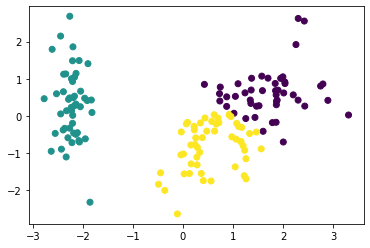

In [6]:
# Use KMeans to classify the data
kmeans = KMeans(n_clusters=3, init="k-means++").fit(proj_X)
pred = kmeans.labels_

# Visualize the classified data
plt.scatter(proj_X[:,0], proj_X[:,1], c=pred)

print("The k-means++ algorithm classified one of the flowers accurately. It however incorrectly classified some of the data points in the right half of the plot. ")